In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)


In [2]:
df = pd.read_csv("datasets/german_credit.csv")

In [3]:
df['Sex & Marital Status'] = ((df['Sex & Marital Status'] == 2) | (df['Sex & Marital Status'] == 5)).astype(int)

In [4]:
df_male = df[df['Sex & Marital Status'] == 0]
df_female = df[df['Sex & Marital Status'] == 1]
df.drop(columns = ['Sex & Marital Status'])
df_male.drop(columns = ['Sex & Marital Status'])
df_female.drop(columns = ['Sex & Marital Status'])

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,1,4,2,21,3,1,1,3,1,1,1
2,1,2,12,2,9,841,2,4,2,1,4,1,23,3,1,1,2,1,1,1
8,1,4,18,4,3,1098,1,1,4,1,4,3,65,3,2,2,1,1,1,1
9,1,2,24,2,3,3758,3,1,1,1,4,4,23,3,1,1,1,1,1,1
12,1,1,6,4,3,1957,1,4,1,1,4,3,31,3,2,1,3,1,1,1
26,1,1,12,2,2,652,1,5,4,1,4,2,24,3,1,1,3,1,1,1
33,1,4,24,2,3,1376,3,4,4,1,1,3,28,3,2,1,3,1,1,1
35,1,1,6,4,0,860,1,5,1,1,4,4,39,3,2,2,3,1,2,1
39,1,4,24,4,1,3868,1,5,4,1,2,3,41,3,1,2,4,1,2,1
40,1,4,12,4,5,996,5,4,4,1,4,1,23,3,2,2,3,1,1,1


In [5]:
df_male = pd.get_dummies(df_male, columns = ['Account Balance', 'Payment Status of Previous Credit', 'Purpose', 'Guarantors','Most valuable available asset', 'Type of apartment', 'Occupation', 'Telephone', 'Foreign Worker'])
df_female = pd.get_dummies(df_female, columns = ['Account Balance', 'Payment Status of Previous Credit', 'Purpose', 'Guarantors','Most valuable available asset', 'Type of apartment', 'Occupation', 'Telephone', 'Foreign Worker'])
df = pd.get_dummies(df, columns = ['Account Balance', 'Payment Status of Previous Credit', 'Purpose', 'Guarantors','Most valuable available asset', 'Type of apartment', 'Occupation', 'Telephone', 'Foreign Worker'])

In [6]:
df_male.head(10)

,Creditability,Duration of Credit (month),Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Duration in Current address,Age (years),Concurrent Credits,No of Credits at this Bank,No of dependents,Account Balance_1,Account Balance_2,Account Balance_3,Account Balance_4,Payment Status of Previous Credit_0,Payment Status of Previous Credit_1,Payment Status of Previous Credit_2,Payment Status of Previous Credit_3,Payment Status of Previous Credit_4,Purpose_0,Purpose_1,Purpose_2,Purpose_3,Purpose_4,Purpose_5,Purpose_6,Purpose_8,Purpose_9,Purpose_10,Guarantors_1,Guarantors_2,Guarantors_3,Most valuable available asset_1,Most valuable available asset_2,Most valuable available asset_3,Most valuable available asset_4,Type of apartment_1,Type of apartment_2,Type of apartment_3,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Telephone_1,Telephone_2,Foreign Worker_1,Foreign Worker_2
1,1,9,2799,1,3,2,0,2,36,3,2,2,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0
3,1,12,2122,1,3,3,0,2,39,3,2,2,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1
4,1,12,2171,1,3,4,0,4,38,1,2,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1
5,1,10,2241,1,2,1,0,3,48,3,2,2,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1
6,1,8,3398,1,4,1,0,4,39,3,2,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1
7,1,6,1361,1,2,2,0,4,40,3,1,2,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1
10,1,11,3905,1,3,2,0,2,36,3,2,2,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0
11,1,30,6187,2,4,1,0,4,24,3,2,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0
13,1,48,7582,2,1,2,0,4,31,3,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,1,0
14,1,18,1936,5,4,2,0,4,23,3,2,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0


In [7]:
data = np.array(df)
#print(data.shape)
cols = list(df.columns)
#print(cols)
cols.append('Intercept')
cols.remove('Creditability')

In [8]:
data = np.array(df)
Y = data[:,0]
X = np.hstack((data[:,1:], np.ones((data.shape[0],1))))

In [9]:
print(X)

[[1.800e+01 1.049e+03 1.000e+00 ... 1.000e+00 0.000e+00 1.000e+00]
 [9.000e+00 2.799e+03 1.000e+00 ... 1.000e+00 0.000e+00 1.000e+00]
 [1.200e+01 8.410e+02 2.000e+00 ... 1.000e+00 0.000e+00 1.000e+00]
 ...
 [2.100e+01 1.268e+04 5.000e+00 ... 1.000e+00 0.000e+00 1.000e+00]
 [1.200e+01 6.468e+03 5.000e+00 ... 1.000e+00 0.000e+00 1.000e+00]
 [3.000e+01 6.350e+03 5.000e+00 ... 1.000e+00 0.000e+00 1.000e+00]]


In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
clf = LogisticRegression(fit_intercept = False).fit(X,Y)
print(clf.predict(np.reshape(X[6,:], (1,X.shape[1]))))
print(clf.predict_proba(np.reshape(X[6,:], (1,X.shape[1]))))

[1]
[[0.09990055 0.90009945]]


In [12]:
print(clf.score(X,Y))

0.78


In [13]:
def accuracy(preds, actuals):
    return 1 - np.sum(abs(preds-actuals)) / preds.shape[0]

In [14]:
preds = clf.predict(X)
print(accuracy(preds, Y))

0.78


In [15]:
def Pr_Y_given_X(coef,yhat,X):
#     print(X.shape)
#     print(coef.shape)
    return 1/(1+np.exp(-yhat*np.matmul(X,coef)))

In [17]:
#print(1/(1 + np.exp(-1*np.dot(np.reshape(X[6,:],X.shape[1]),np.reshape(coef, coef.shape[1])))))

In [19]:
#print(coef.reshape(coef.shape[1]))

In [21]:
#print(Pr_Y_given_X(coef.reshape(coef.shape[1]),1,X))

In [22]:
def P_Y(actuals):
    return np.sum(actuals) / actuals.shape[0]

In [23]:
print("P(Y=1 | Male) = ", P_Y(df_male['Creditability']))
print("P(Y=1 | Female) = ", P_Y(df_female['Creditability']))

P(Y=1 | Male) =  0.7231884057971014
P(Y=1 | Female) =  0.6483870967741936


In [24]:
def P_Yhat_given_Y(preds,actuals):
    return np.sum(np.multiply(preds, actuals)) / np.sum(actuals)

In [25]:
def P_Y_given_Yhat(preds,actuals):
    return np.sum(np.multiply(preds, actuals)) / np.sum(preds)

In [26]:
data = np.array(df_male)
X_male = np.hstack((data[:,1:], np.ones((data.shape[0],1))))
Y_male = data[:,0]
preds_male = clf.predict(X_male)
print("P(Y = 1 | Yhat = 1, Male) = ", P_Y_given_Yhat(preds_male, Y_male))
data = np.array(df_female)
X_female = np.hstack((data[:,1:], np.ones((data.shape[0],1))))
Y_female = data[:,0]
preds_female = clf.predict(X_female)
print("P(Y = 1 | Yhat = 1, Female) = ", P_Y_given_Yhat(preds_female, Y_female))
print("P(Yhat = 1 | Y = 1, Male) = ", P_Yhat_given_Y(preds_male, Y_male))
print("P(Yhat = 1 | Y = 1, Female) = ", P_Yhat_given_Y(preds_female, Y_female))


P(Y = 1 | Yhat = 1, Male) =  0.815742397137746
P(Y = 1 | Yhat = 1, Female) =  0.7873303167420814
P(Yhat = 1 | Y = 1, Male) =  0.9138276553106213
P(Yhat = 1 | Y = 1, Female) =  0.8656716417910447


In [27]:
def P_X(X):
    return np.sum(X, axis = 0)/X.shape[0]

In [28]:
diff = P_X(X_female) - P_X(X_male)

In [29]:
coef_df = pd.DataFrame(np.vstack((clf.coef_, diff)), columns = cols)

In [30]:
coef_df.head()

,Duration of Credit (month),Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Duration in Current address,Age (years),Concurrent Credits,No of Credits at this Bank,No of dependents,Account Balance_1,Account Balance_2,Account Balance_3,Account Balance_4,Payment Status of Previous Credit_0,Payment Status of Previous Credit_1,Payment Status of Previous Credit_2,Payment Status of Previous Credit_3,Payment Status of Previous Credit_4,Purpose_0,Purpose_1,Purpose_2,Purpose_3,Purpose_4,Purpose_5,Purpose_6,Purpose_8,Purpose_9,Purpose_10,Guarantors_1,Guarantors_2,Guarantors_3,Most valuable available asset_1,Most valuable available asset_2,Most valuable available asset_3,Most valuable available asset_4,Type of apartment_1,Type of apartment_2,Type of apartment_3,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Telephone_1,Telephone_2,Foreign Worker_1,Foreign Worker_2,Intercept
0,-0.026276,-0.000100,0.251658,0.124921,-0.278033,-0.283138,-0.002407,0.012020,0.231381,-0.186279,-0.043947,-0.592837,-0.216365,0.270256,0.940629,-0.478075,-0.429200,0.156228,0.294807,0.857922,-0.512713,0.915136,0.094474,0.237858,-0.036950,-0.233117,-0.588699,0.214640,0.056400,0.254655,-0.017717,-0.319166,0.738566,0.344058,0.102102,0.163223,-0.207699,-0.148702,0.284735,0.265651,0.270304,0.039565,0.037652,0.054162,0.067742,0.333941,-0.263356,0.665039,0.401683
1,-2.122160,-570.237868,-0.119448,-0.514446,-0.208649,1.000000,0.032959,-3.969238,0.036232,-0.117672,-0.159187,0.014306,0.012202,0.002197,-0.028705,-0.001870,0.008462,0.101449,-0.052735,-0.055306,-0.011875,-0.037073,0.083637,-0.008415,0.010659,-0.008509,0.025713,0.000982,-0.051753,-0.003366,0.008555,-0.003319,-0.005236,0.007387,0.033100,0.028424,-0.068911,0.184712,-0.118467,-0.066246,0.024217,0.009350,0.007948,-0.041515,0.080598,-0.080598,0.030248,-0.030248,0.000000


In [31]:
print(np.array(coef_df.loc[[0]]).flatten())
coef_df_adj = coef_df.copy()
print(coef_df_adj['Type of apartment_2'][0])

[-2.62762363e-02 -9.97740560e-05  2.51657519e-01  1.24920929e-01
 -2.78032759e-01 -2.83138438e-01 -2.40722564e-03  1.20199812e-02
  2.31380543e-01 -1.86278893e-01 -4.39467390e-02 -5.92836869e-01
 -2.16365038e-01  2.70256108e-01  9.40628719e-01 -4.78075150e-01
 -4.29199664e-01  1.56228349e-01  2.94807165e-01  8.57922220e-01
 -5.12713360e-01  9.15136425e-01  9.44735484e-02  2.37857995e-01
 -3.69502994e-02 -2.33117130e-01 -5.88699212e-01  2.14640139e-01
  5.64000078e-02  2.54654806e-01 -1.77174758e-02 -3.19166014e-01
  7.38566410e-01  3.44058197e-01  1.02101536e-01  1.63222598e-01
 -2.07699412e-01 -1.48702272e-01  2.84734554e-01  2.65650638e-01
  2.70304352e-01  3.95650922e-02  3.76517314e-02  5.41617446e-02
  6.77416978e-02  3.33941222e-01 -2.63356320e-01  6.65039240e-01
  4.01682920e-01]
0.28473455422113353


In [32]:
coefs = np.array(coef_df.loc[[0]]).flatten()
probs = Pr_Y_given_X(coefs,1,X_male)
preds = np.array([1 if p >= 0.5 else 0 for p in probs])
# preds = np.apply_along_axis(lambda x: 1 if x >= 0.5 else 0, 0, Pr_Y_given_X(coefs,1,X_male))
# print(preds)
# print(accuracy(preds, Y_male))
print(coefs)
coefs[0] = 0
print(probs[1:10])
probs = Pr_Y_given_X(coefs,1,X_male)
print(probs[1:10])

[-2.62762363e-02 -9.97740560e-05  2.51657519e-01  1.24920929e-01
 -2.78032759e-01 -2.83138438e-01 -2.40722564e-03  1.20199812e-02
  2.31380543e-01 -1.86278893e-01 -4.39467390e-02 -5.92836869e-01
 -2.16365038e-01  2.70256108e-01  9.40628719e-01 -4.78075150e-01
 -4.29199664e-01  1.56228349e-01  2.94807165e-01  8.57922220e-01
 -5.12713360e-01  9.15136425e-01  9.44735484e-02  2.37857995e-01
 -3.69502994e-02 -2.33117130e-01 -5.88699212e-01  2.14640139e-01
  5.64000078e-02  2.54654806e-01 -1.77174758e-02 -3.19166014e-01
  7.38566410e-01  3.44058197e-01  1.02101536e-01  1.63222598e-01
 -2.07699412e-01 -1.48702272e-01  2.84734554e-01  2.65650638e-01
  2.70304352e-01  3.95650922e-02  3.76517314e-02  5.41617446e-02
  6.77416978e-02  3.33941222e-01 -2.63356320e-01  6.65039240e-01
  4.01682920e-01]
[0.7440224  0.63178704 0.83815687 0.90009945 0.88900323 0.55651353
 0.78526377 0.45020929 0.75471594]
[0.7993595  0.70165803 0.87072003 0.9174762  0.9036328  0.62622666
 0.88942649 0.74296453 0.83158421

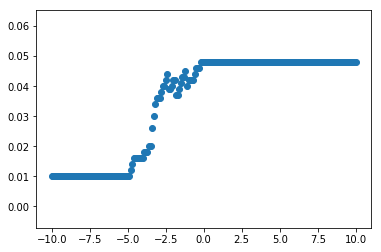

In [36]:
x = np.array(range(-100,101))/10
delta = np.array(range(-100,101))/10
group1 = []
group2 = []
for d in delta:
    coef_df_adj = coef_df.copy()
    coef_df_adj.loc[0, 'Foreign Worker_2'] = coef_df_adj['Foreign Worker_2'][0] + d
    #print(coef_df_adj.head())
    coefs = np.array(coef_df_adj.loc[[0]]).flatten()
    #print(coefs)
    probs = Pr_Y_given_X(coefs,1,X_male)
    #print(probs[1])
    preds = np.array([1 if p >= 0.5 else 0 for p in probs])
    #print(P_Yhat_given_Y(preds, Y_male))
    group1.append(P_Yhat_given_Y(preds, Y_male))
    
    probs = Pr_Y_given_X(coefs,1,X_female)
   # print(probs[1])
    preds = np.array([1 if p >= 0.5 else 0 for p in probs])
    #print(P_Yhat_given_Y(preds, Y_female))
    group2.append(P_Yhat_given_Y(preds, Y_female))
    
plt.scatter(x, np.array(group1)-np.array(group2))
    

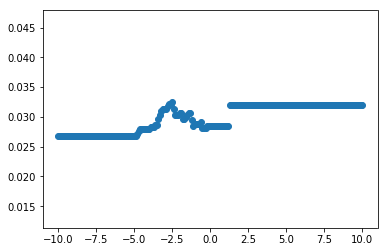

In [34]:
x = np.array(range(-100,101))/10
delta = np.array(range(-100,101))/10
group1 = []
group2 = []
for d in delta:
    coef_df_adj = coef_df.copy()
    coef_df_adj.loc[0, 'Foreign Worker_2'] = coef_df_adj['Foreign Worker_2'][0] + d
    #print(coef_df_adj.head())
    coefs = np.array(coef_df_adj.loc[[0]]).flatten()
    #print(coefs)
    probs = Pr_Y_given_X(coefs,1,X_male)
    #print(probs[1])
    preds = np.array([1 if p >= 0.5 else 0 for p in probs])
    #print(P_Yhat_given_Y(preds, Y_male))
    group1.append(P_Y_given_Yhat(preds, Y_male))
    
    probs = Pr_Y_given_X(coefs,1,X_female)
   # print(probs[1])
    preds = np.array([1 if p >= 0.5 else 0 for p in probs])
    #print(P_Yhat_given_Y(preds, Y_female))
    group2.append(P_Y_given_Yhat(preds, Y_female))
    
plt.scatter(x, np.array(group1)-np.array(group2))
    